# Mission 2
Appliquez un algorithme de classification, puis analysez le résultat obtenu.

Visualisez la partition obtenue dans le premier plan factoriel de l'ACP, puis analysez-la.



# Le Principe de l'algorithme des k-means

**Le clustering ayant pour objectif de séparer vos données en groupes homogènes ayant des caractéristiques communes**. 
L’algorithme des K-moyennes (K-means) est un algorithme non supervisé très connu en matière de Clustering.


Étant donnés des points et un entier k, **l’algorithme vise à diviser les points en k groupes, appelés clusters, homogènes et compacts.**


**L’idée** est assez simple et intuitive. La première étape consiste à définir 2 centroïdes aléatoirement auxquels on associe 2 étiquettes par exemple 0,1. Ensuite nous allons pour chaque point regarder leur distance aux 2 centroïdes et nous associons le point au centroïde le plus proche et l’étiquette correspondante. Cela revient à étiqueter nos données.
Enfin on recalcule 2 nouveaux centroïdes qui seront les centres de gravité de chaque nuage de points labellisés. On répète ces étapes jusqu’à ce que les nouveaux centroïdes ne bougent plus des précédents.
Dans l’algorithme des k-moyennes généralement on utilise **la distance euclidienne**.

Elle permet d’évaluer la distance entre chaque point et les centroïdes. Pour chaque point on calcule la distance euclidienne entre ce point et chacun des centroïdes puis on l’associe au centroïde le plus proche c’est-à-dire celui avec la plus petite distance.
Il existe des méthodes pour déterminer le nombre de clusters idéal. La plus connu est la méthode du coude. Elle s’appuie sur la notion d’inertie. On définit cette dernière comme ceci : la somme des distances euclidiennes entre chaque point et son centroïde associé. Evidemment plus on fixe un nombre initial de clusters élevés et plus on réduit l’inertie : les points ont plus de chance d’être à côté d’un centroïde. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import cluster

from P6_Functions import *



In [2]:

#import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing


In [3]:
df = pd.read_csv('datas/notes.csv' , header=0, sep=",", decimal=".")
df.sample(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
159,False,171.72,104.46,104.12,4.21,3.61,110.31
133,False,171.69,104.17,104.37,5.31,3.54,111.89
143,False,172.00,104.46,104.30,5.27,3.37,111.85
73,True,171.52,103.92,103.66,3.81,3.15,113.54
66,True,171.73,103.60,103.34,3.82,3.15,112.89


In [4]:
df_km = df.copy()
df_km.index = df_km['is_genuine']
del df_km['is_genuine']
X = df_km.values
std_scale = preprocessing.StandardScaler().fit(X) # Fit des valeurs sur le modèle
X_scaled= std_scale.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=df_km.columns) # Valeurs standardisées
X_scaled.head()

X_scaled

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633
1,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697
2,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405
3,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571
4,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777
...,...,...,...,...,...,...
165,0.555689,0.550431,1.581436,0.896930,1.738009,-0.857535
166,3.507789,1.761301,1.157201,0.611230,-0.510944,-1.801418
167,1.736529,0.684972,0.520847,0.382670,0.677182,-2.050950
168,-0.395543,-0.324086,-0.145809,0.168395,1.610710,-0.759892


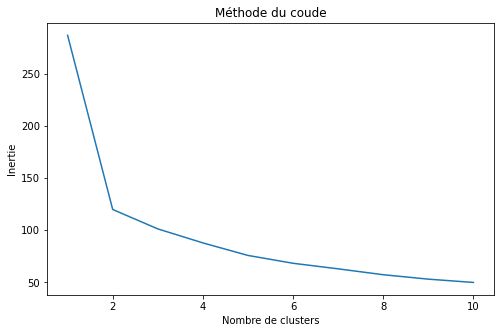

In [5]:
inertia = []
K_range = range(1,11)

for k in K_range :
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.savefig("graphiques/08. Méthode du coude KMeans.jpg", dpi=500, bbox_inches='tight', pad_inches=0.5)
plt.show()

Par la Méthode du coude, la confirmation d'un k=2 prend tout son sens. En effet, l'ajout d'un ou plusieurs groupes n'apporterait pas d'information pertinente dans le contexte. Un k>2 serait possible dans la condition d'un jeu de données apportant une précision plus fine, comme par exemple dans la valorisation du billet, cela pourrait permettre de classifier les billets selon leur valeur en plus du type.

In [6]:
#Classification des individus par apprentissage non-supervisé K-Means en deux clusters 
cls = cluster.KMeans(n_clusters=2) 
cls.fit(X_scaled)

KMeans(n_clusters=2)

In [7]:
# Récupération des clusters attribués à chaque individu
clusters_km = cls.labels_
clusters_km

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [8]:
df_km['Cluster'] = clusters_km
df_km.sample(6)

,diagonal,height_left,height_right,margin_low,margin_up,length,Cluster
is_genuine,,,,,,,
False,171.92,104.37,104.05,4.95,3.04,110.61,1
False,172.22,104.41,104.64,5.20,3.37,112.20,1
False,171.97,104.38,104.18,5.59,3.47,110.98,1
True,171.79,103.51,103.25,4.05,3.08,112.71,0
True,172.10,103.95,103.72,4.49,3.07,113.15,0
False,172.00,104.46,104.30,5.27,3.37,111.85,1


In [9]:
#Tableau des Centroïdes 2 clusters dans sa version centrée réduite
#La comparaison est tout de suite simplifiée, les dimensions prenant la même importance!
centroids = km.cluster_centers_
pd.DataFrame(centroids, columns=X_scaled.columns)


#Tableau des Centroïdes 2 clusters dans sa version centrée réduite
#La comparaison est tout de suite simplifiée, les dimensions prenant la même importance!
centroids = cls.cluster_centers_
pd.DataFrame(centroids, columns=df.columns)

NameError: name 'km' is not defined